In [42]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

In [43]:
df = pd.read_csv("results/px/costs.csv", names=["from", "to", "cost"])
df

,from,to,cost
0,grouped_bar,slope_chart,8.5
1,grouped_bar,stacked_bar,2.0
2,slope_chart,grouped_bar,11.0
3,slope_chart,stacked_bar,11.0
4,stacked_bar,grouped_bar,2.0
5,stacked_bar,slope_chart,8.5


In [67]:

df = pd.read_csv("results/px/costs.csv", names=["from", "to", "cost"])
square = df.pivot_table(index="from", columns="to", values="cost").fillna(0)
order = square.index
mds = MDS(n_components=2, dissimilarity="precomputed")
embedding = mds.fit_transform((square.values + square.values.T) / 2)
emb_min = embedding.min()
emb_max = embedding.max()
emb_span = emb_max - emb_min
emb_max += emb_span / 2
emb_min -= emb_span / 2
emb_df = pd.DataFrame(embedding, index=order, columns=["x", "y"])

In [73]:
frm = emb_df.loc["grouped_bar"]
to = emb_df.loc["slope_chart"]

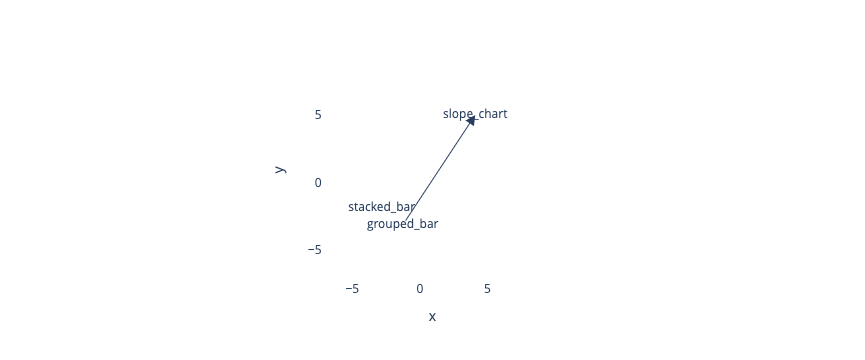

In [99]:
(px.scatter(
                emb_df,
                x="x",
                y="y",
                text=emb_df.index,
                range_x=[emb_min, emb_max],
                range_y=[emb_min, emb_max],
            )
            .update_layout(plot_bgcolor="white")
            .update_traces(mode="text", cliponaxis=False)
            .update_xaxes(scaleanchor="y", scaleratio=1, constrain="domain")
 .add_annotation(x=to.x, y=to.y, ax=frm.x, ay=frm.y, 
                 arrowhead=2, arrowsize=2, hovertext="yo",
                    axref="x", ayref="y", xref="x", yref="y",
                    xanchor="center", yanchor="middle")
)


In [18]:
order = list(df["from"].unique())

In [66]:
fig = go.FigureWidget(px.density_heatmap(df, x="from", y="to", z="cost", 
                   color_continuous_scale="reds", text_auto=True,
                   category_orders={"from":square.index, "to":square.index}))
fig

FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'histfunc': 'sum',
              'hoverte…

In [41]:
def test(trace, points, state):
    with out:
        print("yooo")

fig.data[0].on_click(test)


In [38]:
import ipywidgets as widgets


In [39]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))